In [1]:
#Imports

#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# Introduction

Finding an accomodation is the most typical problem to be solved, when travelling to other city or country. And one of the most important things in choosing an accomodation is the reservation price. What are the main factors, which affect the reservation prices? Does time of the year influence prices and what are the busiest times of the year to visit particular city? How can we save money on the reservation?

Fortunately, we can try to answer these questions by analysing publicly accessible AirBnB data, available on Inside AirBnB and on Kaggle.

# Initial Insights

AirBnB reservation price is based on following costs (according to AirBnB official website information):

Costs determined by the host:
Nightly price: Nightly rate decided by the host;
Cleaning fee: One-time fee charged by some hosts to cover the cost of cleaning their space;
Extra guest fees: One-time fee charged by some hosts to cover other costs related to using their space;
Costs determined by Airbnb: Airbnb service fee;
Other costs that may be included: currency exchange fees, VAT, other local taxes etc.

# Approach

1/ The first look at the data:
what information we have?
what information is missing?
discover general facts: time period, total number of listings in the dataset,

2/ Initial data preparation:
remove the irrelevant information;
reformat the information and imputing missing values;

3/ High level analysis:
find out high level trends and correlations;
Use machine learning for further analysis.

# Data 
AirBnB provided us with 3 datasets for Seattle:

listings.csv - summary information on listing in Seattle such as: location, host information, cleaning and guest fees, amenities etc.
calendar.csv - calendar data for the listings: availability dates, price for each date.
reviews.csv - summary review data for the listings. This dataset won't be used in further analysis.

# a) Listings Dataset

In [2]:
#read the dataset
listings_df = pd.read_csv('listings.csv')
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [3]:
#find number of listings and number of hosts
listings_number = listings_df['id'].count()
hosts_number = len(listings_df['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number, 
                                                                                          hosts_number))

listings.csv dataset contains information on 3818 listings provided by 2751 hosts.


In [4]:
# Getting to know the data
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<AxesSubplot:title={'center':'Missing values per column, %'}>

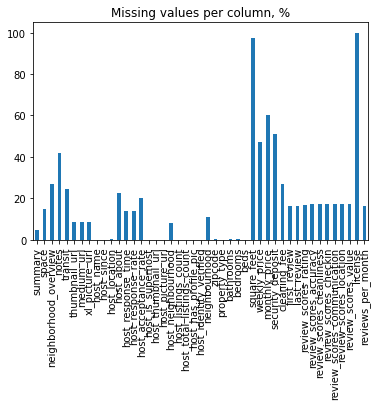

In [6]:
#find percentage of missing values for each column
listings_missing_df = listings_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

As we see on the diagram above, we don't have information on each listing license and on amount of square feets for each listing. We can also see that there are more than 40% of missing values for weekly price, monthly price and security deposit, but we are not going to use these data in our analysis anyway, because it will obviously lead to overfitting our machine learning model.

b) Statistics for calendar.csv dataset:

In [7]:
#read the dataset
calendar_df = pd.read_csv('calendar.csv')

#find number of rows in dataset
rows_num = calendar_df.shape[0]

#find first and last date of the calendar
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()

print('calendar.csv dataset contains %d rows.' % (rows_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

calendar.csv dataset contains 1393570 rows.
The first date of observation is 2016-01-04 and the last date is 2017-01-02.


In [8]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


<AxesSubplot:title={'center':'Missing values per column, %'}>

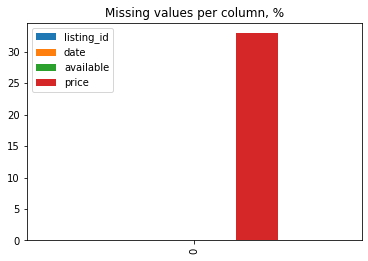

In [10]:
#get percentage of missing values for each column in dataset
calendar_missing_df = pd.DataFrame([calendar_df.isnull().mean()*100])

#plot the results
calendar_missing_df.plot.bar(title='Missing values per column, %')

# Initial Data Preparation

Before trying to get the first outcomes, the data should be pre-processed:

datasets should be merged into one using the listing identifier;
irrelevant columns and columns, which contain missing data should be removed from the analysis;
dates and prices should be converted from text into numbers.

In [11]:
#Helper functions for dataset cleaning

def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])

def get_host_since_year(row):
    ''' Get year from a date represented as a string '''
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

def get_extra_people_fee(row):
    ''' Return 1 when the is fee for exatra people '''
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

#Main dataset cleaning function
def clean_dataset(listings_df, calendar_df):
    '''
    INPUT
    listings_df - pandas dataframe containing listings data 
    calendar_df - pandas dataframe containing calendar data
    
    OUTPUT
    df - cleaned dataset, which contains merged tables:
    1. irrelevant columns are dropped;
    2. string containing dates are converted into numbers;
    3. columns, containing lists, are split into several columns (for example, amenities)
    4. missing values are imputed with mean or mode.
    '''
    #merge datasets
    listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(calendar_df, listings_df, on = 'listing_id')
    
    #drop the irrelevant columns
    columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    df = df.drop(columns = columns_to_drop)
    
    #convert date from the calendar into month and drop the date colum
    df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)
    df['year'] = df.apply(lambda row: get_year_from_date(row),axis=1)
    df = df.drop(columns = ['date'])
    
    #remove rows where price_x == nan, because price will be used as response column
    df = df.dropna(subset=['price_x'])
    
    #convert price to number and drop the price_x column
    df['price'] = df['price_x'].astype(str)
    df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
    df = df.drop(columns = ['price_x'])
    
    #convert host_since date into number and fill in missing values, drop the original column
    df['host_since_year'] = df.apply(lambda row: get_host_since_year(row),axis=1)
    df['host_since_year'].fillna(df['host_since_year'].mean(), inplace = True)
    df = df.drop(columns = ['host_since'])
    
    #convert host_response_rate into number and fill in missing values, drop the original column
    df['host_response_rate_num'] = df['host_response_rate'].astype(str)
    df['host_response_rate_num'] = df['host_response_rate_num'].str.replace("%", "").astype("float")
    df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)
    
    df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    
    df = df.drop(columns = ['host_response_rate', 'host_response_rate_num'])
    
    #fill missing values with mean value for host_listings_count
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    
    #split host_verifications into dummy columns and drop the original column
    split_list_into_columns(df, 'host_verifications')
    df = df.drop(columns = ['host_verifications'])
    
    #fill in missing values for bathrooms, bedrooms and beds with mode
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
    df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    #split amenities into dummy columns and drop the original column
    split_list_into_columns(df, 'amenities')
    df = df.drop(columns = ['amenities'])
    
    #turn extra people fee into binary column (1 - if fee for extra people is charged, 0 - otherwise)
    df['extra_people_fee'] = df.apply(lambda row: get_extra_people_fee(row),axis=1)
    df = df.drop(columns = ['extra_people'])
    
    #fill missing values for review scores columns
    review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
    for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)
    
    return df

In [12]:
# apply functions above to clean dataset
df = clean_dataset(listings_df, calendar_df)

<ipython-input-11-dbba220b04d9>:101: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace("[$, ]", "").astype("float")


# High Level Analysis

In [13]:
df.head()

,listing_id,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,...,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,extra_people_fee
0,241032,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,241032,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
9,241032,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
10,241032,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
14,241032,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   listing_id                          934542 non-null  int64  
 1   host_response_time                  826028 non-null  object 
 2   host_is_superhost                   934450 non-null  object 
 3   host_listings_count                 934542 non-null  float64
 4   host_has_profile_pic                934450 non-null  object 
 5   host_identity_verified              934450 non-null  object 
 6   neighbourhood_group_cleansed        934542 non-null  object 
 7   property_type                       934233 non-null  object 
 8   room_type                           934542 non-null  object 
 9   accommodates                        934542 non-null  int64  
 10  bathrooms                           934542 non-null  float64
 11  bedrooms                 

<AxesSubplot:title={'center':'Missing values per column, %'}>

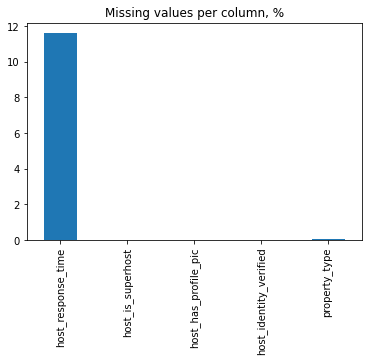

In [15]:
#find percentage of missing values for each column
df_missing = df.isnull().mean()*100

#filter out only columns, which have missing values
df_columns_with_nan = df_missing[df_missing > 0]

#plot the results
df_columns_with_nan.plot.bar(title='Missing values per column, %')

In [16]:
df['host_response_time'].fillna(df['host_response_time'].mean(), inplace = True)

TypeError: can only concatenate str (not "int") to str

In [ ]:
#find percentage of missing values for each column
df_missing = df.isnull().mean()*100

#filter out only columns, which have missing values
df_columns_with_nan = df_missing[df_missing > 0]

#plot the results
df_columns_with_nan.plot.bar(title='Missing values per column, %')